---

## Introduction

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  
Generally, customer segmentation can help to personalise marketing efforts which has the potential to increase revenue, reduce customer churn, increase marketing efficiency through higher conversion rates, and to improve customer experience. Hence this report aims at segmenting FMCG customers such that recommendations can be derived to support the abovementioned goals.

<hr style="width:35%;margin-left:0;"> 

## Data Overview

The data contains the following characteristics of 2000 FMCG customers:
- Sex: male (0) or female (1)
- Marital Status: single (0) or non-single (1)
- Age
- Education: other/unknown (0), high school (1), university (2), graduate school (3)
- Income
- Occupation: unemployed/unskilled (0), skilled employee (1), management/self-employed/highly skilled employee (2)
- Settlement Size: small city (0), mid-sized city (1), big city (2)


<hr style="width:35%;margin-left:0;">

In [24]:
# import libraries
import pandas as pd
import dataframe_image as dfi
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
from scipy.cluster.hierarchy import linkage
import matplotlib.patches as mpatches

## Exploratory Data Analysis

In [2]:
# read data in
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [4]:
df.rename(columns={'Marital status': 'Married',
                   'Settlement size': 'City'}, inplace=True)

In [5]:
df.shape

(2000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          2000 non-null   int64
 1   Sex         2000 non-null   int64
 2   Married     2000 non-null   int64
 3   Age         2000 non-null   int64
 4   Education   2000 non-null   int64
 5   Income      2000 non-null   int64
 6   Occupation  2000 non-null   int64
 7   City        2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df.isnull().sum()

ID            0
Sex           0
Married       0
Age           0
Education     0
Income        0
Occupation    0
City          0
dtype: int64

In [8]:
test_stats = df.drop('ID', axis=1).describe().round(2)
dfi.export(test_stats, 'data/summary_stats.png')
test_stats

Sex  Married      Age  Education     Income  Occupation     City
count  2000.00   2000.0  2000.00    2000.00    2000.00     2000.00  2000.00
mean      0.46      0.5    35.91       1.04  120954.42        0.81     0.74
std       0.50      0.5    11.72       0.60   38108.82        0.64     0.81
min       0.00      0.0    18.00       0.00   35832.00        0.00     0.00
25%       0.00      0.0    27.00       1.00   97663.25        0.00     0.00
50%       0.00      0.0    33.00       1.00  115548.50        1.00     1.00
75%       1.00      1.0    42.00       1.00  138072.25        1.00     1.00
max       1.00      1.0    76.00       3.00  309364.00        2.00     2.00

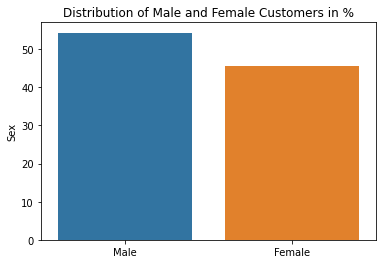

In [9]:
sex = pd.DataFrame(df.Sex.value_counts(normalize=True)*100)
sex.rename(index={0: 'Male', 1: 'Female'}, inplace=True)
sns.barplot(x=sex.index, y=sex.Sex).set_title('Distribution of Male and Female Customers in %');

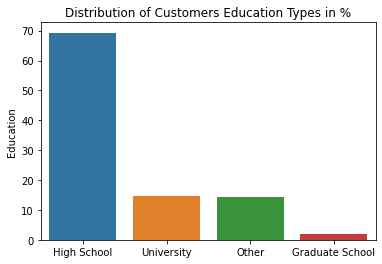

In [10]:
edu = pd.DataFrame(df.Education.value_counts(normalize=True)*100).reset_index(drop=True)
edu.rename(index={0: 'High School', 1: 'University', 2: 'Other', 3:'Graduate School'}, inplace=True)
sns.barplot(x=edu.index, y=edu.Education).set_title('Distribution of Customers Education Types in %');

In [11]:
edu

Education
High School          69.30
University           14.55
Other                14.35
Graduate School       1.80

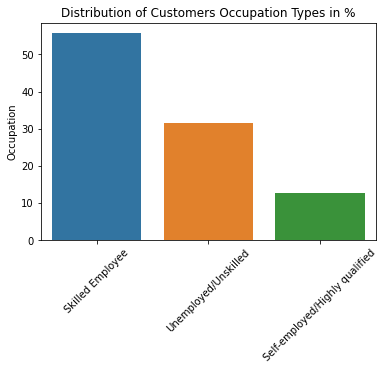

In [12]:
occ = pd.DataFrame(df.Occupation.value_counts(normalize=True)*100).reset_index(drop=True)
occ.rename(index={0: 'Skilled Employee', 1: 'Unemployed/Unskilled', 2: 'Self-employed/Highly qualified'}, inplace=True)
sns.barplot(x=occ.index, y=occ.Occupation).set_title('Distribution of Customers Occupation Types in %')
plt.xticks(rotation='45');

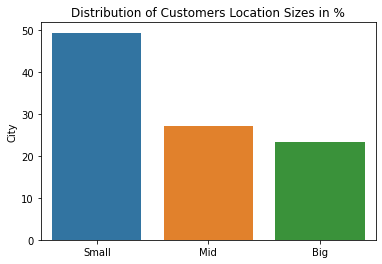

In [13]:
city = pd.DataFrame(df.City.value_counts(normalize=True)*100).reset_index(drop=True)
city.rename(index={0: 'Small', 1: 'Mid', 2: 'Big'}, inplace=True)
sns.barplot(x=city.index, y=city.City).set_title('Distribution of Customers Location Sizes in %');

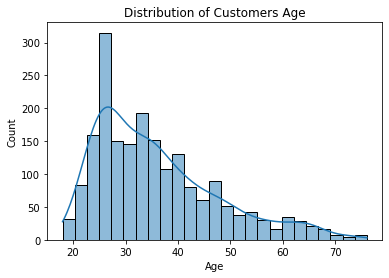

In [14]:
sns.histplot(x=df.Age, stat='count', kde=True).set_title('Distribution of Customers Age');

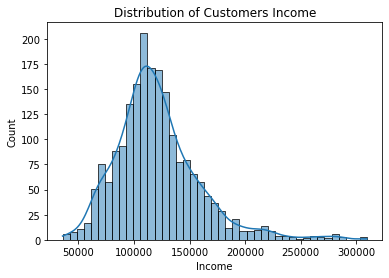

In [15]:
sns.histplot(x=df.Income, stat='count', kde=True).set_title('Distribution of Customers Income');

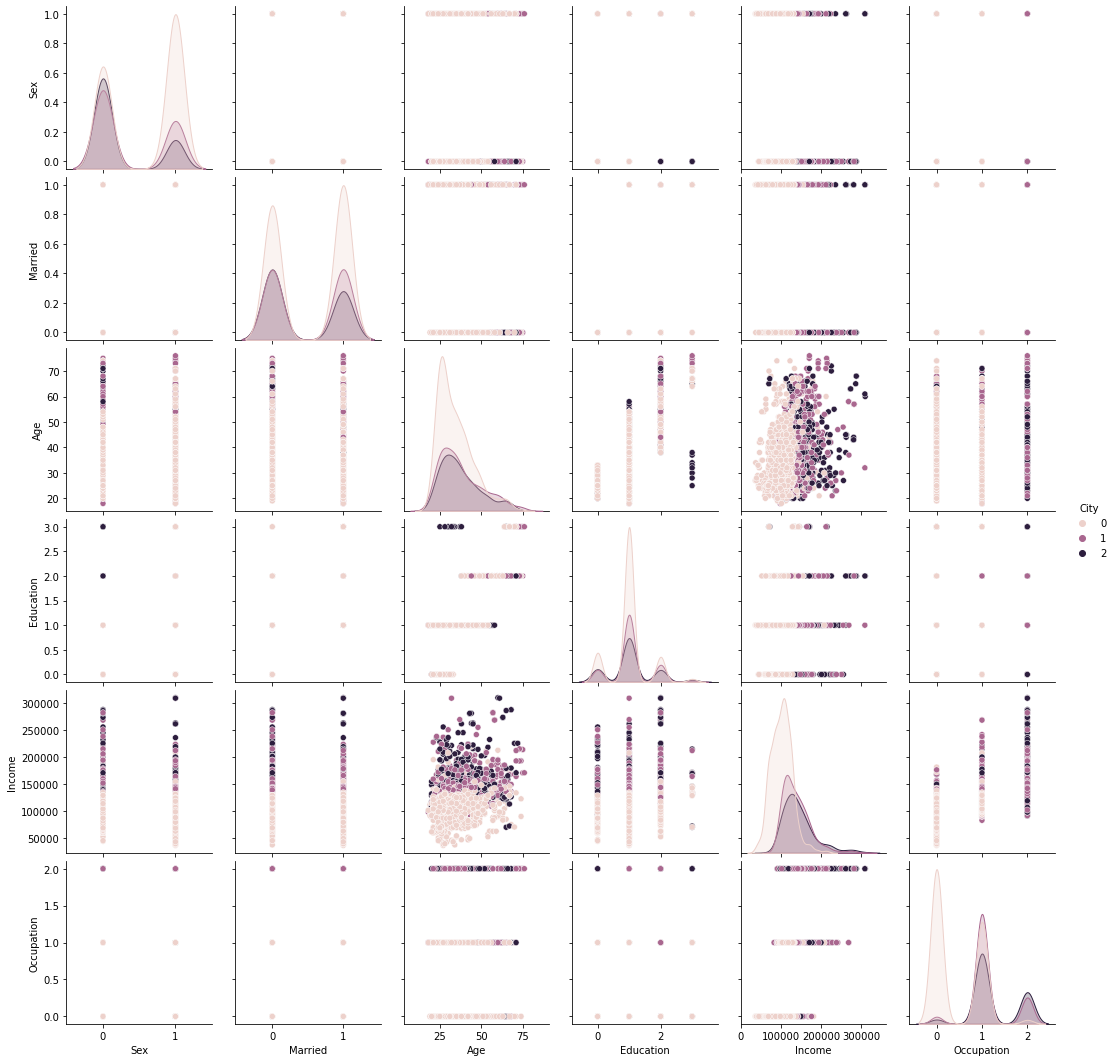

In [16]:
sns.pairplot(df.drop(['ID'], axis=1), hue='City');

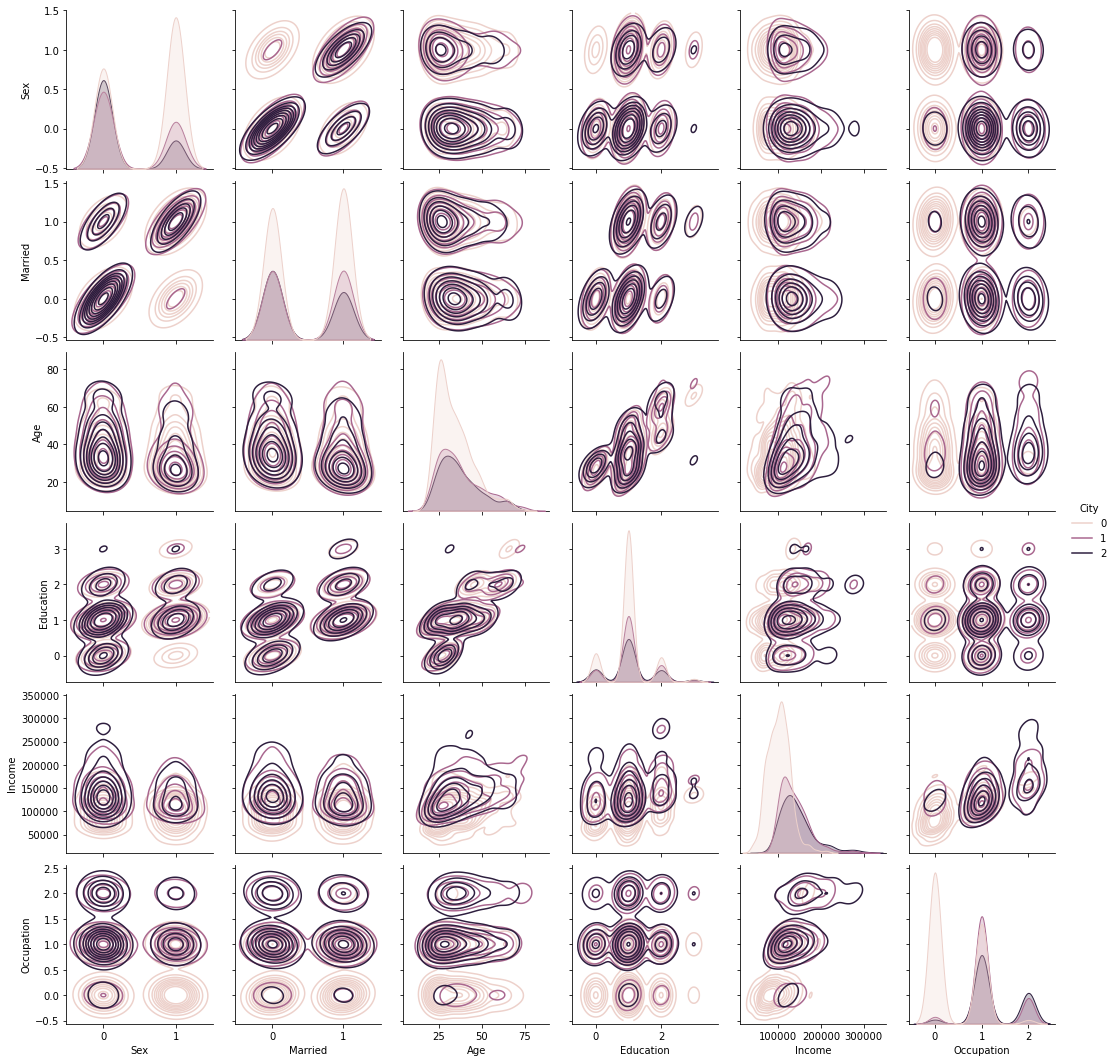

In [17]:
sns.pairplot(df.drop(['ID'], axis=1), hue='City', kind="kde");

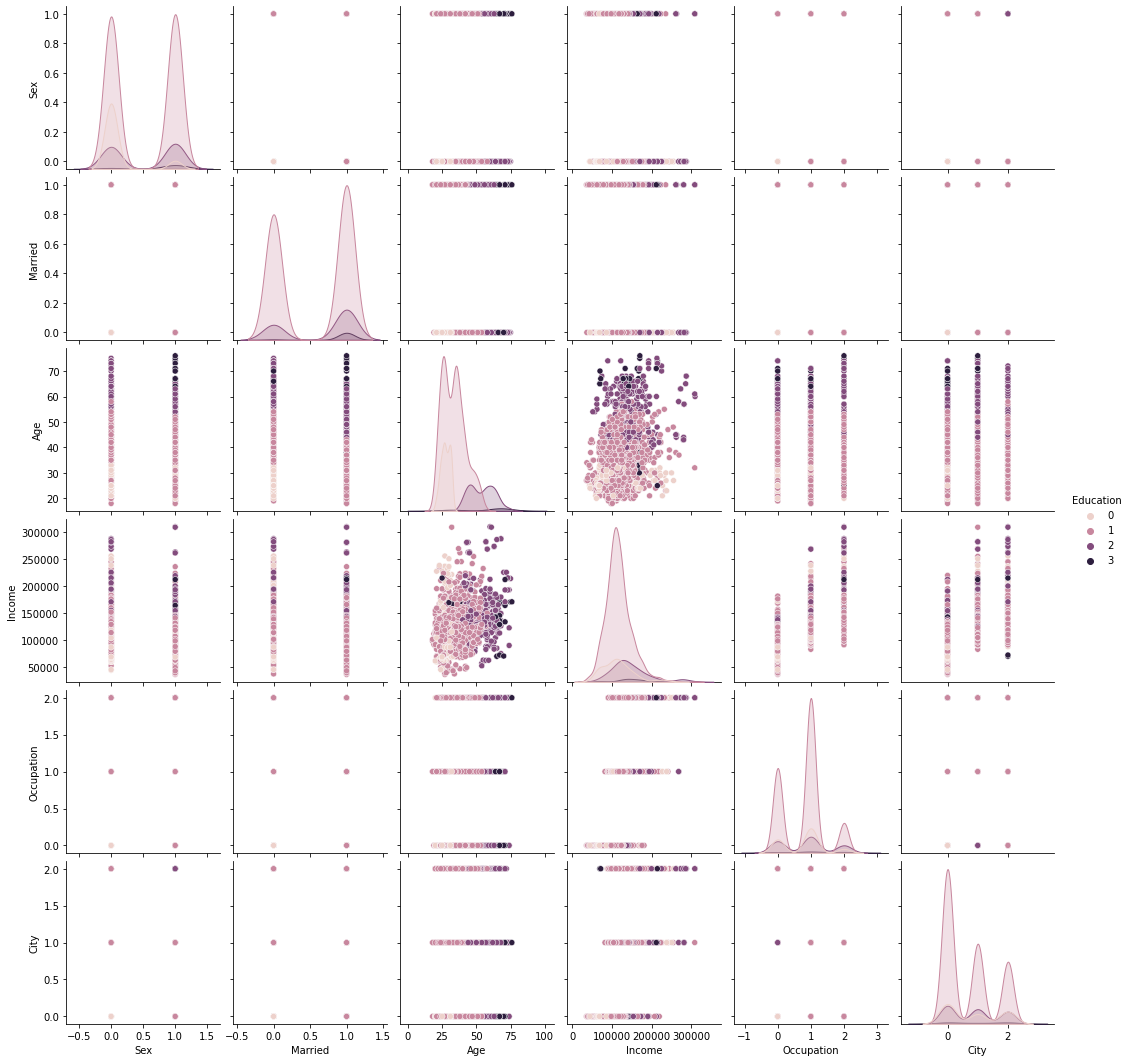

In [18]:
sns.pairplot(df.drop(['ID'], axis=1), hue='Education');

/Users/felixrosenbergernew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/felixrosenbergernew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/felixrosenbergernew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/felixrosenbergernew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/felixrosenbergernew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/felixrosenbergernew/opt/anaconda3/lib/python3.9/site-

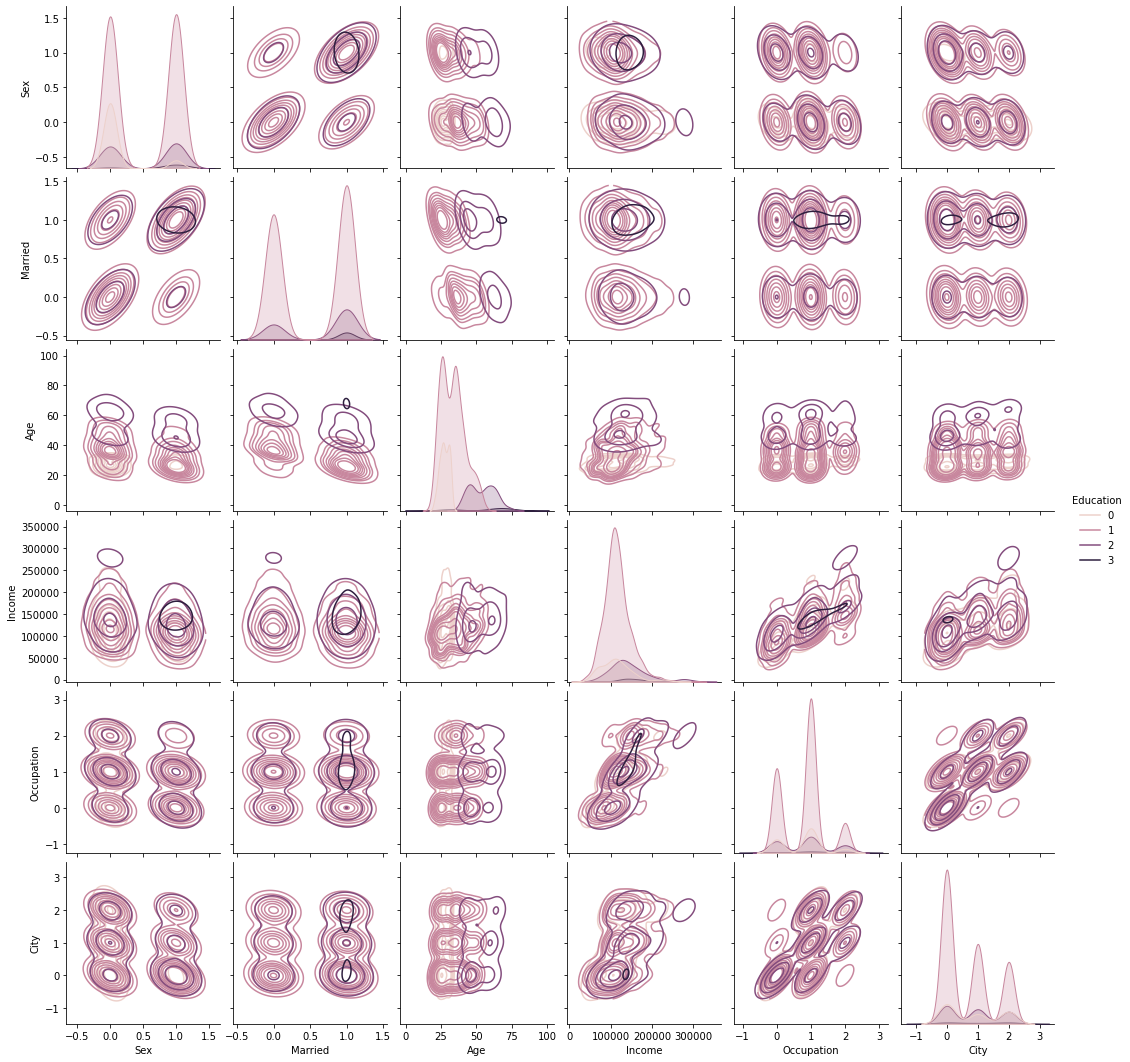

In [19]:
sns.pairplot(df.drop(['ID'], axis=1), hue='Education', kind='kde');

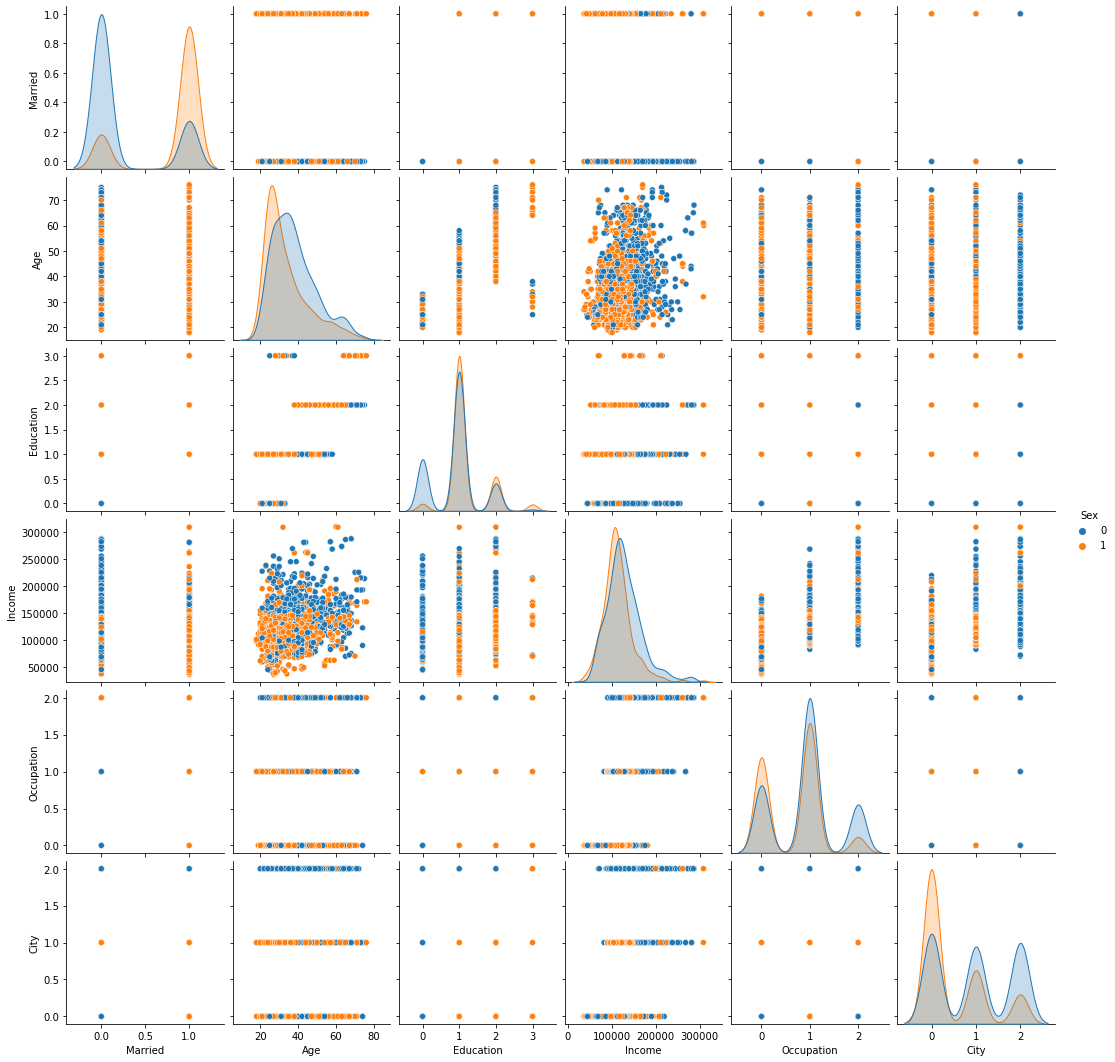

In [20]:
sns.pairplot(df.drop(['ID'], axis=1), hue='Sex');

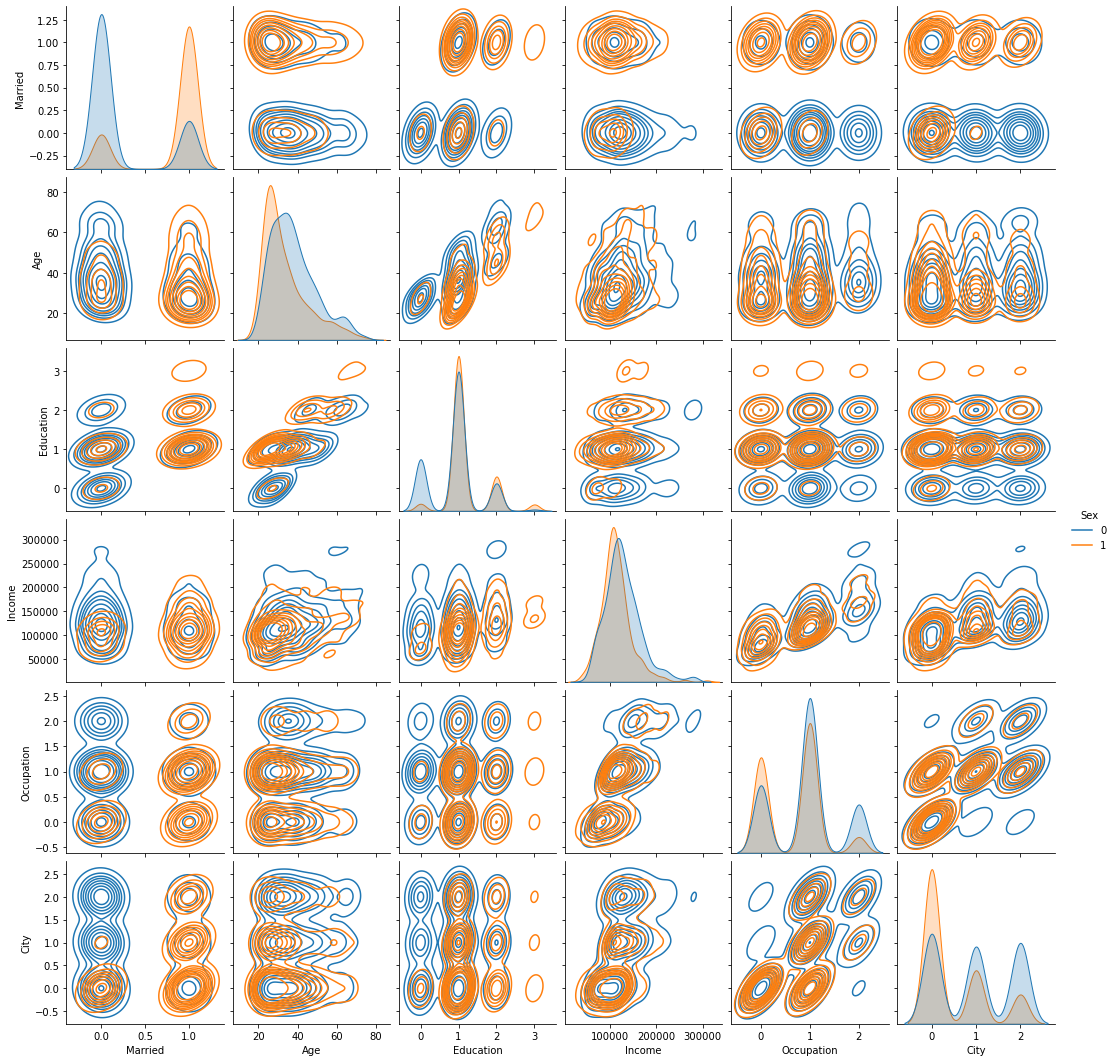

In [21]:
sns.pairplot(df.drop(['ID'], axis=1), hue='Sex', kind='kde');

In [22]:
#df['ID'] / 
total = df[df.Sex==0].groupby(['Education'])['ID'].count().reset_index().sort_values('ID', ascending=False)
total['Percent'] = total['ID'] / total.ID.sum() * 100
total

Education   ID    Percent
1          1  688  63.351750
0          0  255  23.480663
2          2  136  12.523020
3          3    7   0.644567

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


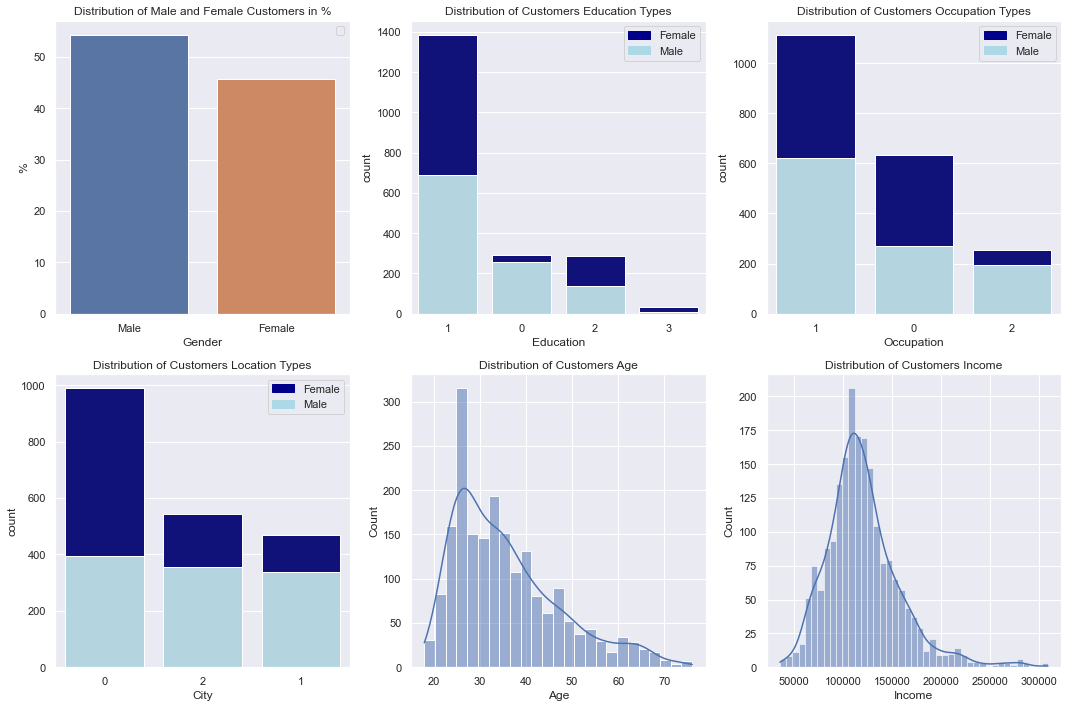

In [25]:
# summarise relevant plots 
# set plot style: grey grid in the background:
sns.set(style="darkgrid")
fig, axes = plt.subplots(2,3, figsize=(15, 10))

# gender distribution
sns.barplot(x=sex.index, y=sex.Sex, ax=axes[0,0])
axes[0,0].set_title('Distribution of Male and Female Customers in %')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('%')
axes[0,0].legend()

# education distribution
# top bar -> count all values to find y position of the bars
total = df.groupby(['Education'])['ID'].count().reset_index().sort_values('ID', ascending=False)
# bar chart 1 -> top bars (female)
bar1 = sns.barplot(x="Education",  y="ID", data=total, order = total.index, color='darkblue', ax=axes[0,1])
# bottom bar ->  take only male values from the data
male = df[df.Sex==0]
# bar chart 2 -> bottom bars (male)
bar2 = sns.countplot(x="Education", data=male, order = male['Education'].value_counts().index, color='lightblue', ax=axes[0,1])
# add legend
top_bar = mpatches.Patch(color='darkblue', label='Female')
bottom_bar = mpatches.Patch(color='lightblue', label='Male')
axes[0,1].legend(handles=[top_bar, bottom_bar])
axes[0,1].set_title('Distribution of Customers Education Types')

# occupation distribution
# top bar -> count all values to find y position of the bars
total = df.groupby(['Occupation'])['ID'].count().reset_index().sort_values('ID', ascending=False)
# bar chart 1 -> top bars (female)
bar1 = sns.barplot(x="Occupation",  y="ID", data=total, order = total.index, color='darkblue', ax=axes[0,2])
# bottom bar ->  take only male values from the data
male = df[df.Sex==0]
# bar chart 2 -> bottom bars (male)
bar2 = sns.countplot(x="Occupation", data=male, order = male['Occupation'].value_counts().index, color='lightblue', ax=axes[0,2])
# add legend
top_bar = mpatches.Patch(color='darkblue', label='Female')
bottom_bar = mpatches.Patch(color='lightblue', label='Male')
axes[0,2].legend(handles=[top_bar, bottom_bar])
axes[0,2].set_title('Distribution of Customers Occupation Types')

# location distribution
# top bar -> count all values to find y position of the bars
total = df.groupby(['City'])['ID'].count().reset_index().sort_values('ID', ascending=False)
# bar chart 1 -> top bars (female)
bar1 = sns.barplot(x="City",  y="ID", data=total, order = total.index, color='darkblue', ax=axes[1,0])
# bottom bar ->  take only male values from the data
male = df[df.Sex==0]
# bar chart 2 -> bottom bars (male)
bar2 = sns.countplot(x="City", data=male, order = male['City'].value_counts().index, color='lightblue', ax=axes[1,0])
# add legend
top_bar = mpatches.Patch(color='darkblue', label='Female')
bottom_bar = mpatches.Patch(color='lightblue', label='Male')
axes[1,0].legend(handles=[top_bar, bottom_bar])
axes[1,0].set_title('Distribution of Customers Location Types')

# age distribution
sns.histplot(x=df.Age, stat='count', kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribution of Customers Age')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Count')

# income distribution
sns.histplot(x=df.Income, stat='count', kde=True, ax=axes[1,2])
axes[1,2].set_title('Distribution of Customers Income')
axes[1,2].set_xlabel('Income')
axes[1,2].set_ylabel('Count')

plt.tight_layout()
plt.show()

fig.savefig('data/eda_plot_individual_features.png', dpi=300)

/Users/felixrosenbergernew/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


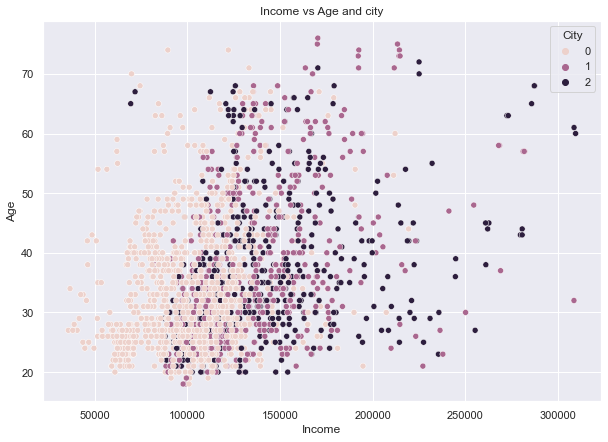

In [26]:
# summarise relevant pairwise plots 
fig, ax = plt.subplots(figsize=(10, 7))

# Income vs Age with city
sns.scatterplot(df.Income, df.Age, hue=df.City, ax=ax)
ax.set_title('Income vs Age and city')
ax.set_xlabel('Income')
ax.set_ylabel('Age')
fig.savefig('data/pairwise_eda.png', dpi=300)

### Data Summary

The data contains slightly more male customers, but it is balanced between singles and non-singles. Moreover, the average customer is almost 36 years old, has a high school education, earns close to $121,000, is a skilled employee, and lives in a small to mid-sized city.  

The characteristic distributions by gender show the following:
- Most customers have high school education with a balance across genders. Most customers with unkown/other education are male. Only a small number of customers has graduate school education, and they are mostly female.  
- Most customers work as skilled employees with a balance across genders. There are many customers who are unskilled/unemployed with a slight majority of female over male. Most customers who are highly skilled/self-employed are male, but the overall number of customers in these jobs is low.
- Roughly 50% of customers live in small cities with most being females. Roughly similar number of customers live in mid-sized or big cities, with relatively more males. Especially in mid-sized cities, male customers are overrepresented.
- Most customers are around 30 years old, but there are many older customers. They seem sufficiently represented and are not treated as outliers in the following.
- The distribution of customer income is heavily centred around the mean, but there are customers who earn significantly more. As these might belong to the expectedly small cohort who buy premium products, they won’t be treated as outliers. However, in future modelling approaches, these should be targeted specifically.

## Customer Segmentation

### KMeans

In [27]:
# drop ID
from sklearn.preprocessing import StandardScaler

df.drop('ID', axis=1, inplace=True)

In [28]:
# scale data
scaler = StandardScaler()

scaled = pd.DataFrame(columns=['Age_scaled', 'Income_scaled'])

scaled[['Age_scaled', 'Income_scaled']] = scaler.fit_transform(df[['Age', 'Income']])



In [29]:
# join df
df_scaled = pd.concat([df, scaled], axis=1)

In [30]:
df_scaled.head()

Sex  Married  Age  Education  Income  Occupation  City  Age_scaled  \
0    0        0   67          2  124670           1     2    2.653614   
1    1        1   22          1  150773           1     2   -1.187132   
2    0        0   49          1   89210           0     0    1.117316   
3    0        0   45          1  171565           1     1    0.775916   
4    0        0   53          1  149031           1     1    1.458716   

   Income_scaled  
0       0.097524  
1       0.782654  
2      -0.833202  
3       1.328386  
4       0.736932

In [31]:
# drop non-normalised data for final df
df_scaled.drop(columns=['Age', 'Income'], inplace=True)

In [32]:
df_scaled.head()

Sex  Married  Education  Occupation  City  Age_scaled  Income_scaled
0    0        0          2           1     2    2.653614       0.097524
1    1        1          1           1     2   -1.187132       0.782654
2    0        0          1           0     0    1.117316      -0.833202
3    0        0          1           1     1    0.775916       1.328386
4    0        0          1           1     1    1.458716       0.736932

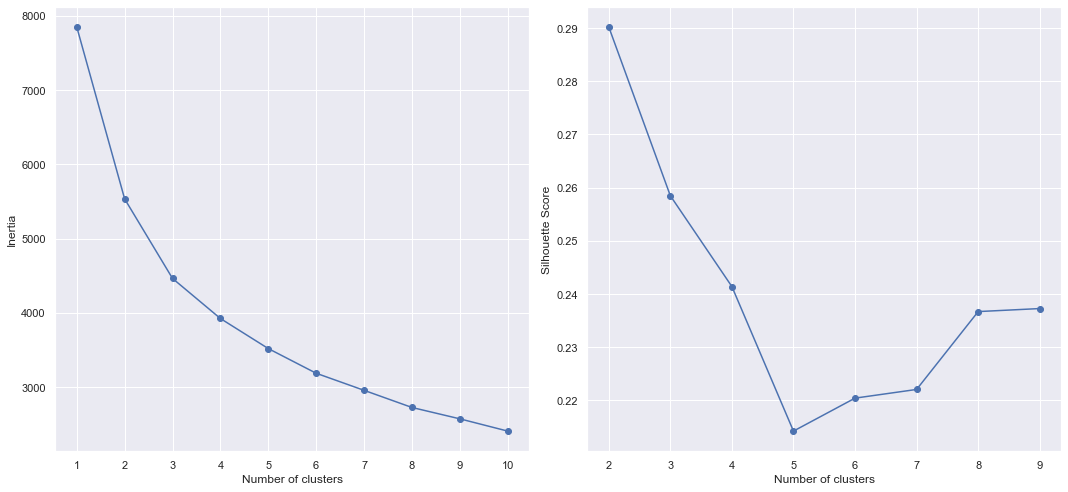

In [33]:
fig, axes = plt.subplots(1,2, figsize=(15, 7))

# elbow method
inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

axes[0].plot(range(1, 11), inertias, marker='o')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_xticks(range(1,11))

# evaluate using silhouette score
silhouette_scores = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    n_init=10, 
                    max_iter=300, 
                    random_state=0)
    cluster_labels = kmeans.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

axes[1].plot(range(2,10), silhouette_scores, marker='o')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(range(2,10))

plt.tight_layout()
plt.show()

fig.savefig('data/kmeans_elbow_sil.png', dpi=300)


Three clusters seem to be a good number to feed into Kmeans according to the Elbow Method and the Silhouette Score.

In [34]:
# cluster again
km = KMeans(n_clusters=3, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
km.fit(df_scaled)
y_km = km.predict(df_scaled)

In [35]:
# add cluster labels to unscaled df
df['cluster'] = km.labels_
df.head()

Sex  Married  Age  Education  Income  Occupation  City  cluster
0    0        0   67          2  124670           1     2        1
1    1        1   22          1  150773           1     2        0
2    0        0   49          1   89210           0     0        2
3    0        0   45          1  171565           1     1        1
4    0        0   53          1  149031           1     1        1

In [36]:
df.cluster.value_counts()

2    963
0    685
1    352
Name: cluster, dtype: int64

#### Feature Distribution per Cluster

In [37]:
km.feature_names_in_

array(['Sex', 'Married', 'Education', 'Occupation', 'City', 'Age_scaled',
       'Income_scaled'], dtype=object)

In [38]:
df.columns

Index(['Sex', 'Married', 'Age', 'Education', 'Income', 'Occupation', 'City',
       'cluster'],
      dtype='object')

In [39]:
# align column names
cluster_df = df.rename(columns={'Marital status': 'Married', 
                                'Age': 'Age_scaled', 
                                'Settlement size': 'City',
                                'Income': 'Income_scaled'})
cluster_df = cluster_df[['Sex',
                          'Married',
                          'Education',
                          'Occupation',
                          'City',
                          'Age_scaled',
                          'Income_scaled',
                          'cluster']]
                       
# align column order
cluster_df.columns.to_list()

['Sex',
 'Married',
 'Education',
 'Occupation',
 'City',
 'Age_scaled',
 'Income_scaled',
 'cluster']

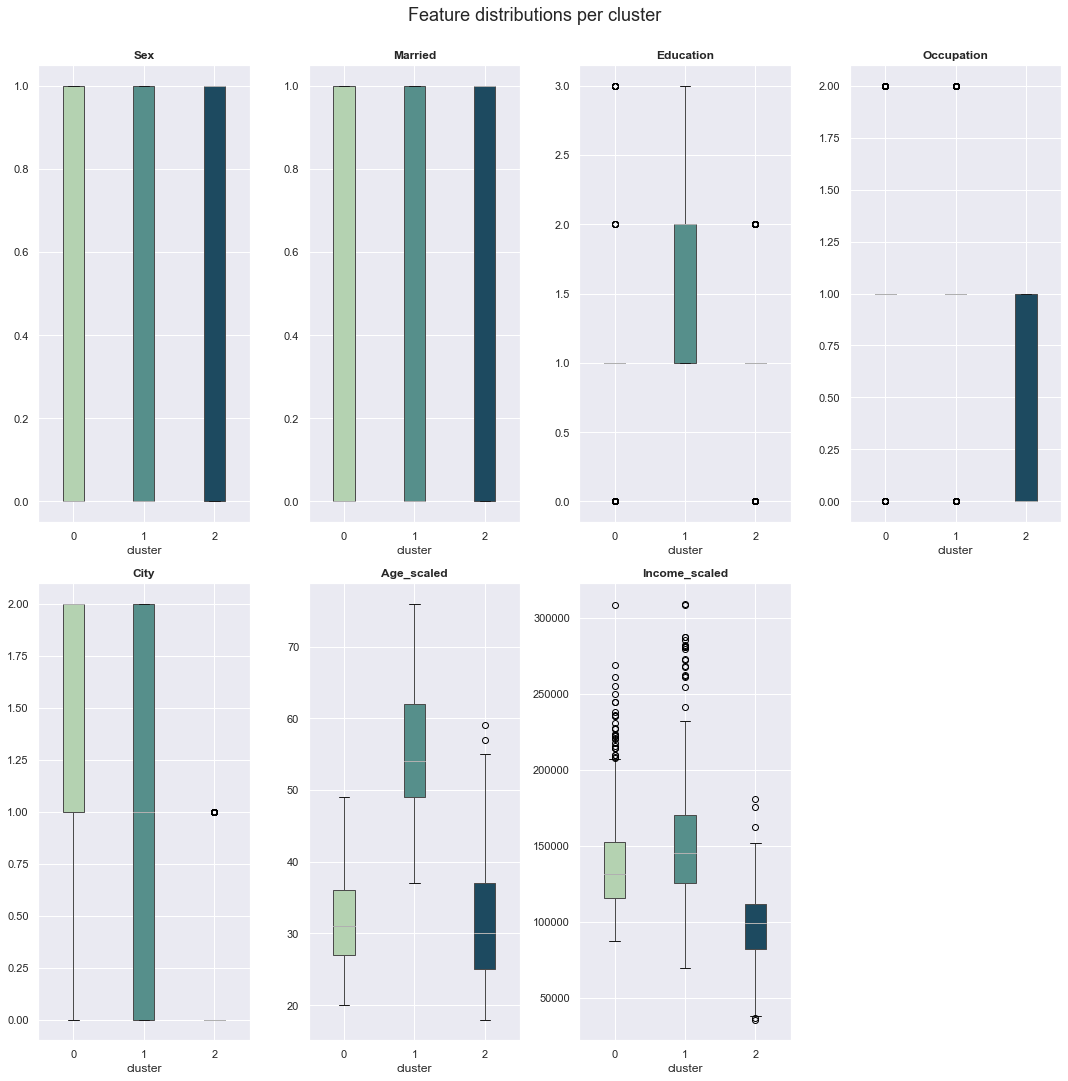

In [40]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
features = km.feature_names_in_
ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = cluster_df[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
plt.tight_layout()
plt.show()
fig.savefig('data/kmeans_feature_dist.png', dpi=300)

In [41]:
# convert df to numpy array
df = df.values

#### Feature Means per Cluster - Centroids Analysis

In [42]:
# convert df to numpy array
cluster_arr = cluster_df.values

In [43]:
km.cluster_centers_

array([[ 0.25255474,  0.40437956,  0.80875912,  1.21021898,  1.48175182,
        -0.33587562,  0.43055473],
       [ 0.36079545,  0.47727273,  1.80965909,  1.08522727,  1.05397727,
         1.66505868,  0.87765591],
       [ 0.63759086,  0.56905504,  0.91900312,  0.42575286,  0.09553479,
        -0.36970494, -0.62706632]])

In [44]:
km.cluster_centers_[:, 5] #scaled age centroids

array([-0.33587562,  1.66505868, -0.36970494])

In [45]:
km.cluster_centers_[:, 6] #scaled income centroids

array([ 0.43055473,  0.87765591, -0.62706632])

In [46]:
scaled_centroids = np.column_stack([km.cluster_centers_[:, 5], km.cluster_centers_[:, 6]])

In [47]:
scaled_centroids

array([[-0.33587562,  0.43055473],
       [ 1.66505868,  0.87765591],
       [-0.36970494, -0.62706632]])

In [48]:
# retransform age and income centroids to original scale
scaler.inverse_transform(scaled_centroids)

array([[3.19737226e+01, 1.37358251e+05],
       [5.54176136e+01, 1.54392491e+05],
       [3.15773624e+01, 9.70636334e+04]])

In [49]:
# get age and income mean in original scale
age_mean = df[:,2].mean()
income_mean = df[:,4].mean()

In [50]:
# get age and income std in original scale
age_std = df[:,2].std()
income_std = df[:,4].std()

In [51]:
# rescale centroids for age and income cluster means
unscaled_centroids = km.cluster_centers_.copy()
unscaled_centroids[:, 5] = km.cluster_centers_[:, 5] * age_std + age_mean
unscaled_centroids[:, 6] = km.cluster_centers_[:, 6] * income_std + income_mean

In [52]:
np.set_printoptions(suppress = True)
unscaled_centroids

array([[     0.25255474,      0.40437956,      0.80875912,
             1.21021898,      1.48175182,     31.97372263,
        137358.25109489],
       [     0.36079545,      0.47727273,      1.80965909,
             1.08522727,      1.05397727,     55.41761364,
        154392.49147727],
       [     0.63759086,      0.56905504,      0.91900312,
             0.42575286,      0.09553479,     31.57736241,
         97063.63343718]])

The order of the centroids is Sex, Marital Status, Education, Occupation, City, Age, Income. The same order as in the cluster_df.

The above shows the following feature means per cluster
- Sex:
    - Cluster 1: 0.25255474
    - Cluster 2: 0.36079545
    - Cluster 3: 0.63759086\
--> cluster 1 primarily male, cluster 2 also with a tendency towards males while cluster 3 is primarily female
- Marital Status:
    - Cluster 1: 0.40437956
    - Cluster 2: 0.47727273
    - Cluster 3: 0.56905504\
--> no real segmentation among marital status. Cluster 1 slight tendency towards single, cluster 2 totally balanced, cluster 3 slight tendency towards non-single.
- Education:
    - Cluster 1: 0.80875912
    - Cluster 2: 1.80965909
    - Cluster 3: 0.91900312\
--> cluster 1 & 3 consists of customers with mostly high school education but also other / unknown. Cluster 2 tends to have significantly higher education.
- Occupation:
    - Cluster 1: 1.21021898
    - Cluster 2: 1.08522727
    - Cluster 3: 0.42575286\
--> Cluster 1 consists of skilled employees and highly qualified employees / management level people. Cluster 2 contains mostly skilled employees. Cluster 3 contains mostly unskilled/unemployed people.
- Settlement Size:
    - Cluster 1: 1.48175182
    - Cluster 2: 1.05397727
    - Cluster 3: 0.09553479\
--> Cluster 1 contains a mix of big city and mid-sized city customers. Cluster 2 mostly mid-sized cities. Cluster 3 is a cluster of small city customers.
- Age:
    - Cluster 1: 31.97372263
    - Cluster 2: 55.41761364
    - Cluster 3: 31.57736241\
--> Cluster 1 & 3 contain customers around their thirties. Cluster 2 contains older customers.
- Income:
    - Cluster 1: 137358.25109489
    - Cluster 2: 154392.49147727
    - Cluster 3: 97063.63343718\
--> Cluster 1 contains customers with income slightly above average. Cluster 2 contains top earning customers. Cluster 3 contains customers with rather lower income.

##### Cluster Summary
- Cluster 1: predominantly younger male customers with a tendency to be single. These tend to be moderately educated but work highly qualified jobs which is reflected in the respective income average for this cluster. The young age could be a reason why this group is not top earning on average even though they are highly skilled, as they might be at the beginning of their career. Also, there seems to be a clear distinction regarding their geographical location as these customers seem to predominantly live in bigger cities.
- Cluster 2: mostly older customers with a slight majority of male over female. Most of them are highly educated and they earn the highest income among all customers. Like customers from cluster 1, they tend to live in bigger cities and work in skilled jobs. Thus, the biggest differentiators to cluster 1 are age, income, education, and occupation. The last three variables seem to be positively correlated.
- Cluster 3: Young, mostly female customers who tend to be non-single. They tend to be moderately educated which aligns them with cluster 1 but differentiates them from cluster 2. However, they tend to be in less skilled occupations than customers from both cluster 1 & 2. Another differentiator to the prevoius clusters is their location as they almost entirely live in smaller cities. These customers also tend to earn lower income.

##### Clusters Sex vs Marital Status

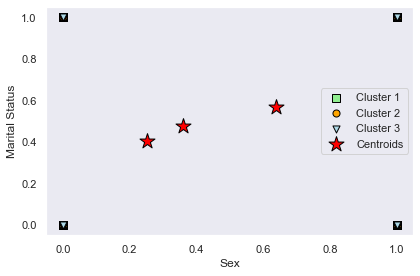

In [53]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 0], cluster_arr[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 0], cluster_arr[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 0], cluster_arr[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Sex')
plt.ylabel('Marital Status')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Clusters Sex vs Education

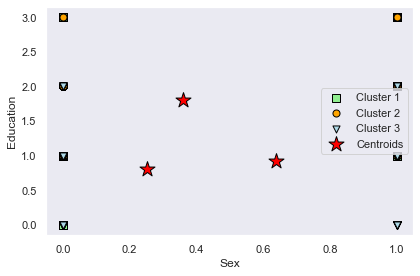

In [54]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 0], cluster_arr[y_km == 0, 2], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 0], cluster_arr[y_km == 1, 2], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 0], cluster_arr[y_km == 2, 2], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 2], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Sex')
plt.ylabel('Education')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Clusters Sex vs Occupation

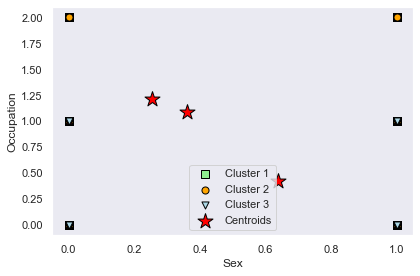

In [55]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 0], cluster_arr[y_km == 0, 3], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 0], cluster_arr[y_km == 1, 3], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 0], cluster_arr[y_km == 2, 3], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 3], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Sex')
plt.ylabel('Occupation')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Clusters Sex vs Settlement Size

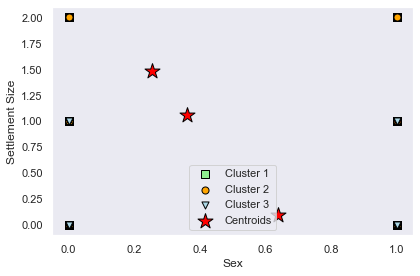

In [56]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 0], cluster_arr[y_km == 0, 4], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 0], cluster_arr[y_km == 1, 4], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 0], cluster_arr[y_km == 2, 4], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 4], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Sex')
plt.ylabel('Settlement Size')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Clusters Sex vs Age

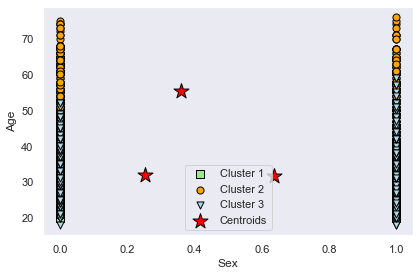

In [57]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 0], cluster_arr[y_km == 0, 5], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 0], cluster_arr[y_km == 1, 5], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 0], cluster_arr[y_km == 2, 5], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 0], unscaled_centroids[:, 5], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Clusters Sex vs Income

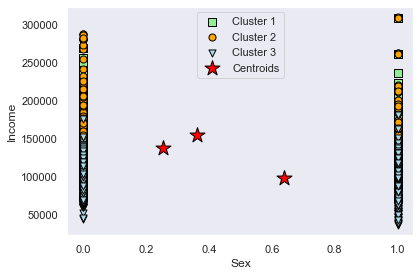

In [58]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 0], cluster_arr[y_km == 0, 6], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 0], cluster_arr[y_km == 1, 6], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 0], cluster_arr[y_km == 2, 6], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 0], unscaled_centroids[:, 6], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Sex')
plt.ylabel('Income')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Education vs Occupation

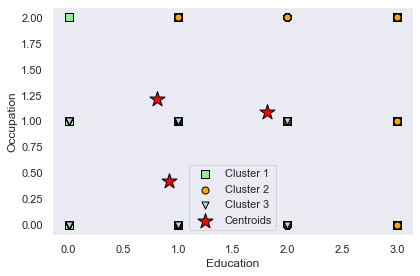

In [59]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 2], cluster_arr[y_km == 0, 3], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 2], cluster_arr[y_km == 1, 3], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 2], cluster_arr[y_km == 2, 3], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Education')
plt.ylabel('Occupation')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Education vs Settlement Size

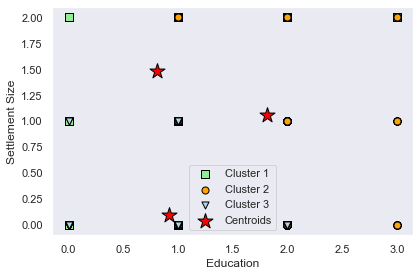

In [60]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 2], cluster_arr[y_km == 0, 4], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 2], cluster_arr[y_km == 1, 4], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 2], cluster_arr[y_km == 2, 4], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 2], unscaled_centroids[:, 4], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Education')
plt.ylabel('Settlement Size')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Education vs Age

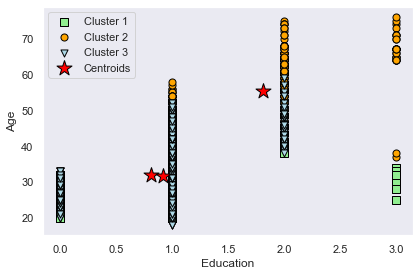

In [61]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 2], cluster_arr[y_km == 0, 5], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 2], cluster_arr[y_km == 1, 5], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 2], cluster_arr[y_km == 2, 5], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 2], unscaled_centroids[:, 5], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Education')
plt.ylabel('Age')
plt.grid()
plt.tight_layout()
plt.savefig('data/cluster_education_age.png', dpi=300)
plt.show()

##### Education vs Income

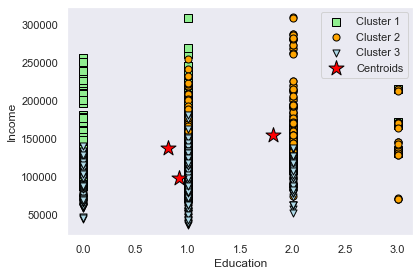

In [63]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 2], cluster_arr[y_km == 0, 6], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 2], cluster_arr[y_km == 1, 6], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 2], cluster_arr[y_km == 2, 6], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 2], unscaled_centroids[:, 6], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Education')
plt.ylabel('Income')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Occupation vs Settlement Size

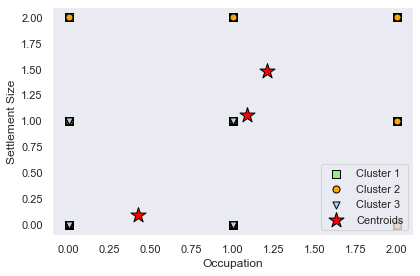

In [64]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 3], cluster_arr[y_km == 0, 4], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 3], cluster_arr[y_km == 1, 4], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 3], cluster_arr[y_km == 2, 4], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 3], unscaled_centroids[:, 4], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Occupation')
plt.ylabel('Settlement Size')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Occupation vs Age

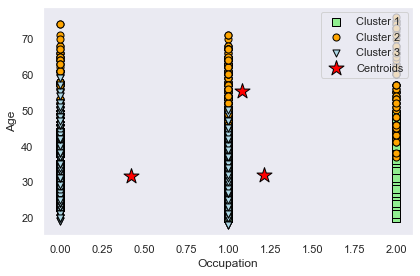

In [65]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 3], cluster_arr[y_km == 0, 5], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 3], cluster_arr[y_km == 1, 5], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 3], cluster_arr[y_km == 2, 5], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 3], unscaled_centroids[:, 5], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Occupation vs Income

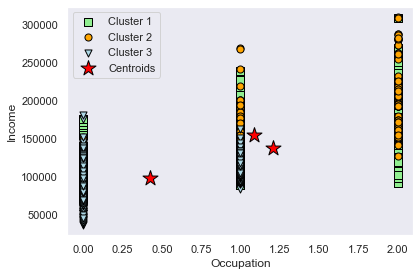

In [66]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 3], cluster_arr[y_km == 0, 6], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 3], cluster_arr[y_km == 1, 6], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 3], cluster_arr[y_km == 2, 6], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 3], unscaled_centroids[:, 6], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Settlement Size vs Age

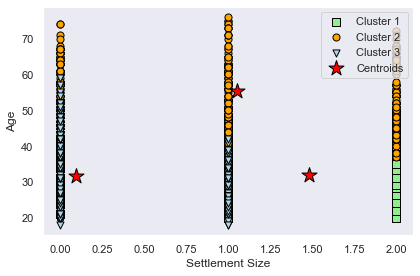

In [67]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 4], cluster_arr[y_km == 0, 5], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 4], cluster_arr[y_km == 1, 5], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 4], cluster_arr[y_km == 2, 5], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 4], unscaled_centroids[:, 5], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Settlement Size')
plt.ylabel('Age')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Settlement Size vs Income

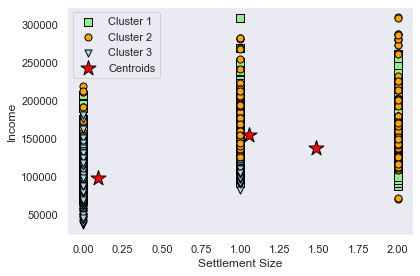

In [68]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 4], cluster_arr[y_km == 0, 6], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 4], cluster_arr[y_km == 1, 6], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 4], cluster_arr[y_km == 2, 6], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 4], unscaled_centroids[:, 6], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Settlement Size')
plt.ylabel('Income')
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

##### Age vs Income

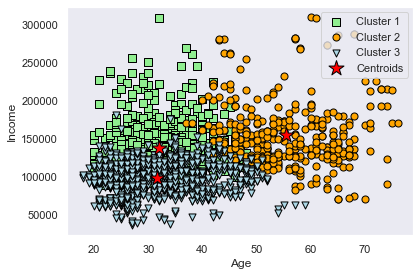

In [69]:
#show clusters for variable pairs
plt.scatter(cluster_arr[y_km == 0, 5], cluster_arr[y_km == 0, 6], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(cluster_arr[y_km == 1, 5], cluster_arr[y_km == 1, 6], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(cluster_arr[y_km == 2, 5], cluster_arr[y_km == 2, 6], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(unscaled_centroids[:, 5], unscaled_centroids[:, 6], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()
plt.tight_layout()
plt.savefig('data/cluster_age_income.png', dpi=300)
plt.show()

Cluster 1 contains young top earners.\
Cluster 2 contains older customers across a wide range of income.\
Cluster 3 contains young customers up to 50 years and earning mid to lower income. There are also older lower income earners, but they seem more rare.

#### Analysis of Feature Ranges per Cluster

In [70]:
# create df from numpy array
columns = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size', 'cluster']
df = pd.DataFrame(df, columns=columns)

In [71]:
X_mean = pd.concat([pd.DataFrame(df.mean().drop('cluster'), columns=['mean']), # overall feature means
                   df.groupby('cluster').mean().T], axis=1) # cluster means

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1) # relative distance per cluster mean to overall mean
X_dev_rel.drop(columns=['mean'], inplace=True)
#X_mean.drop(columns=['mean'], inplace=True)
dfi.export(X_mean.round(2), 'data/kmeans_mean_overview.png')

In [72]:
for i, val in enumerate(X_dev_rel.index):
    print(i,val)

0 Sex
1 Marital status
2 Age
3 Education
4 Income
5 Occupation
6 Settlement size


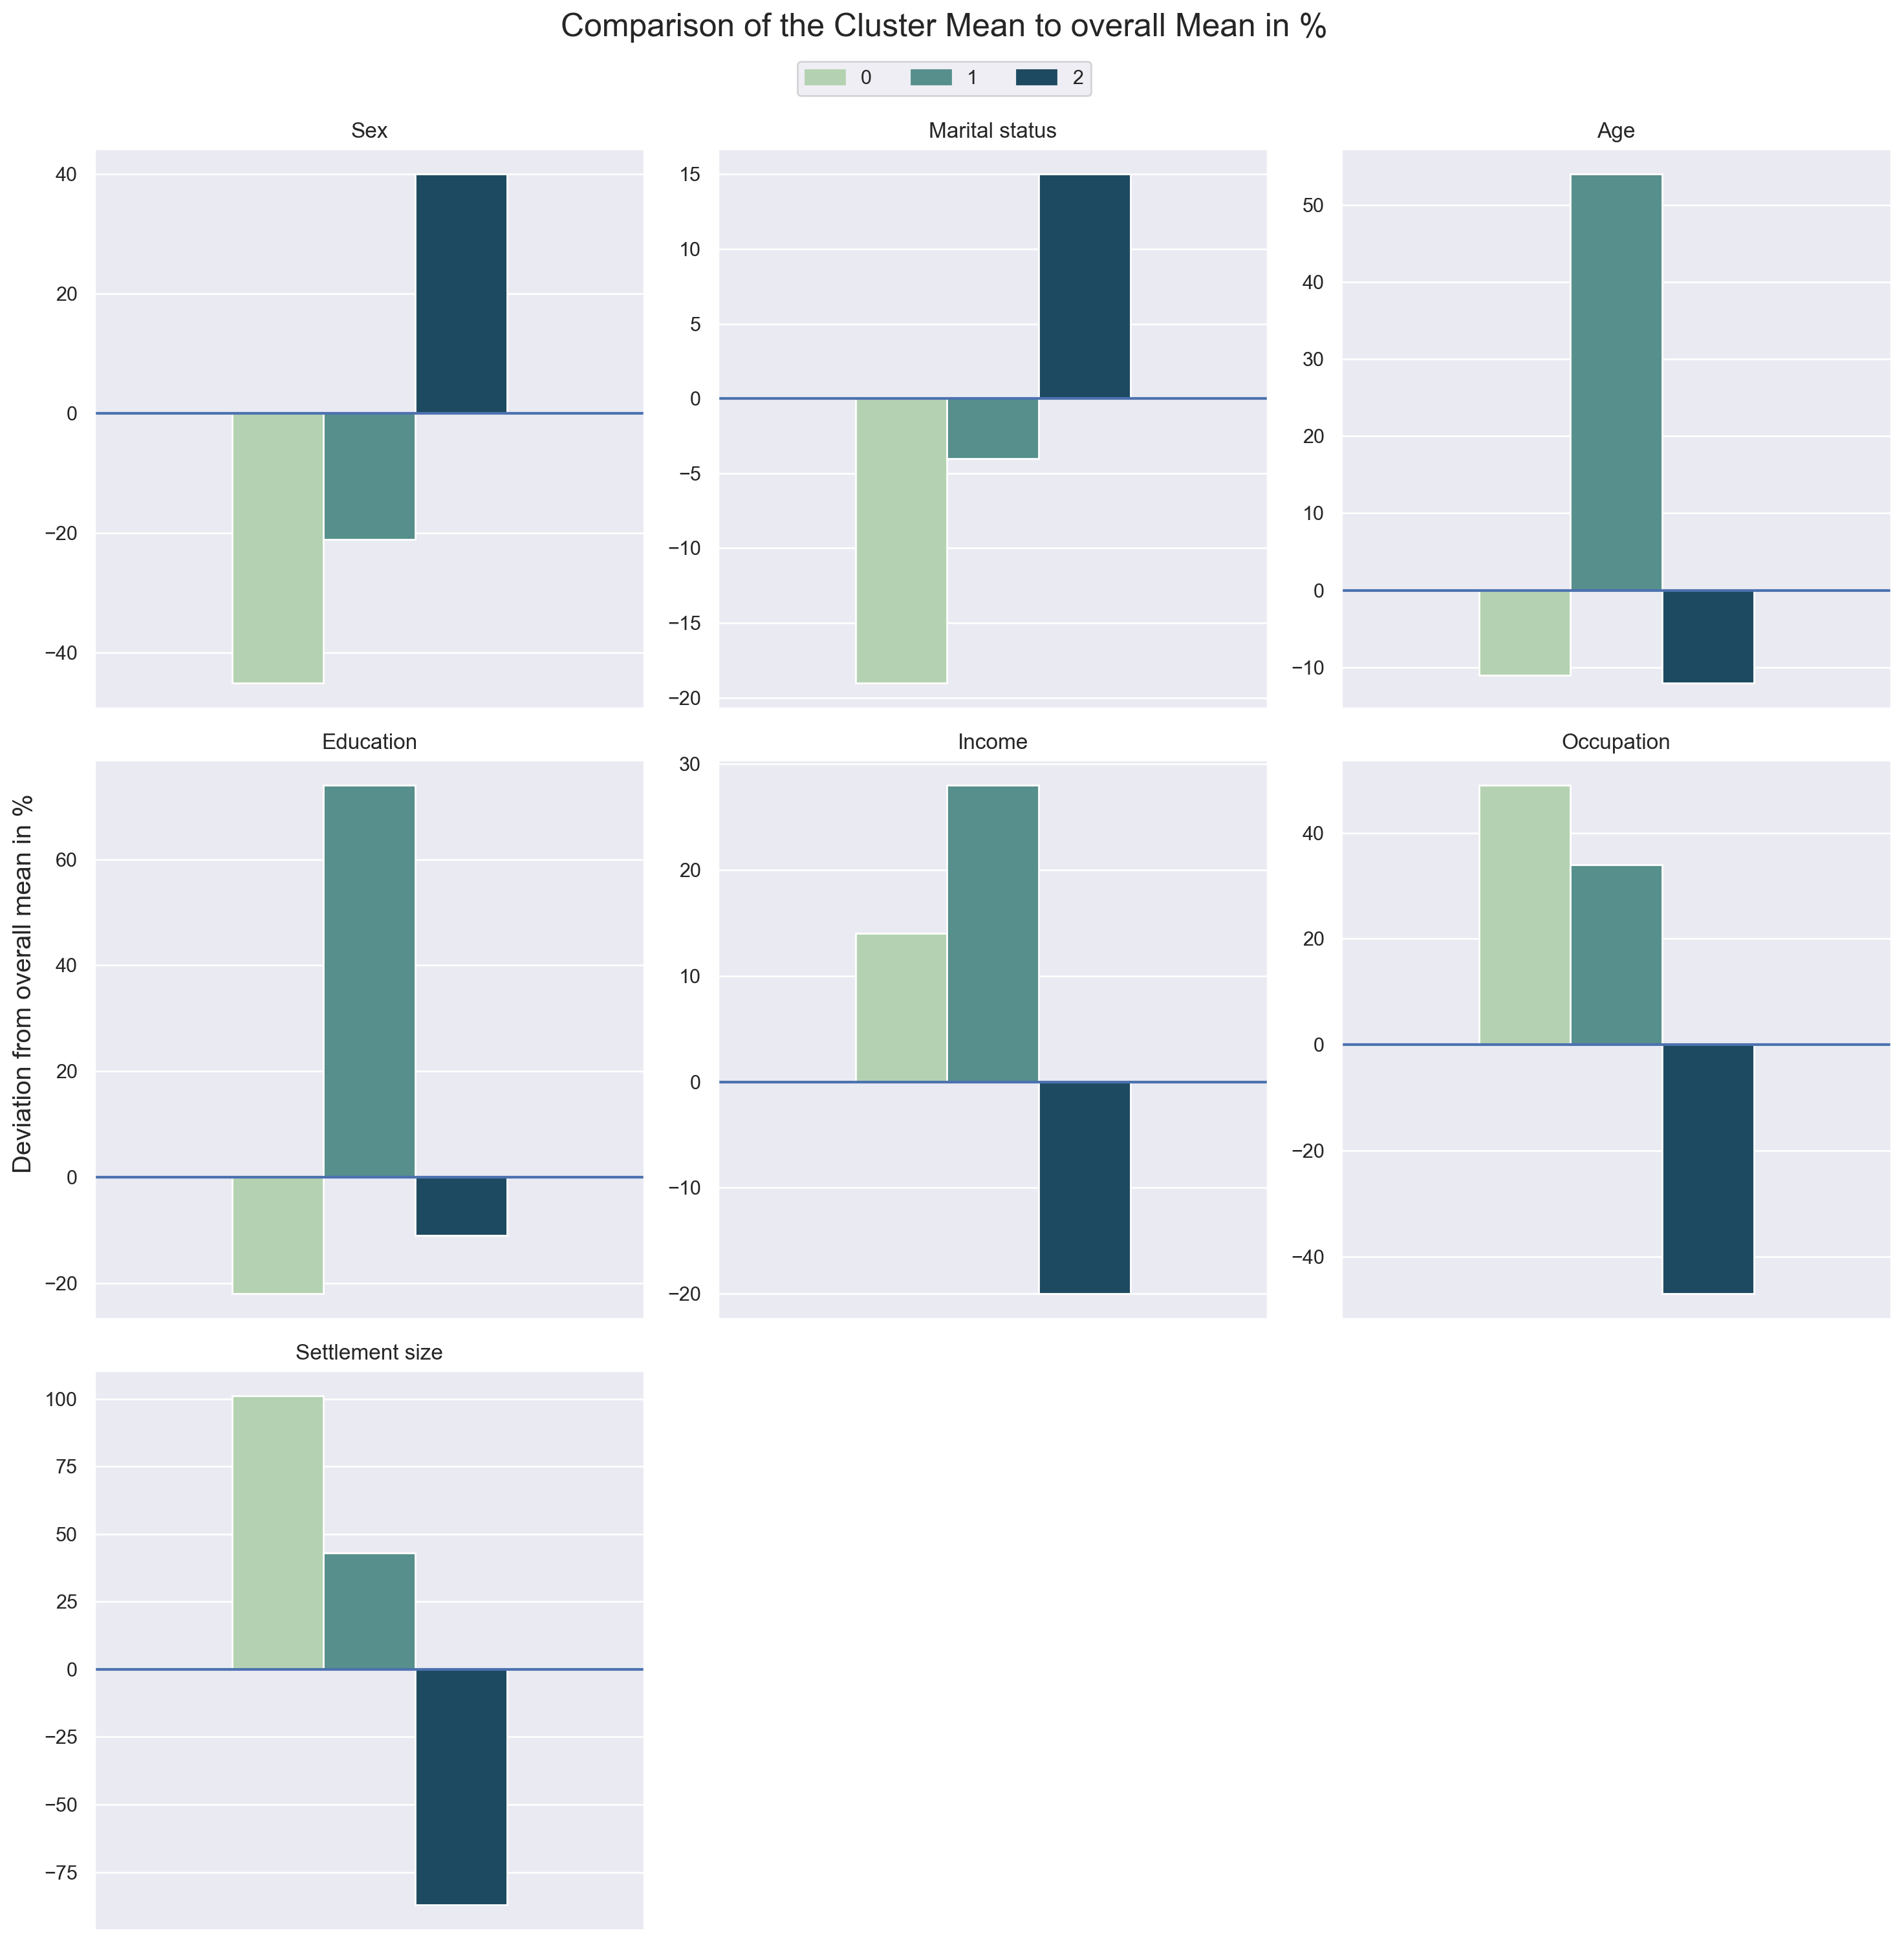

In [73]:
# define cluster colors 
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

def cluster_comparison_bar(X_comparison, colors, deviation=True ,title="Cluster results"):
    
    features = X_comparison.index
    ncols = 3
    nrows = len(features) // ncols + (len(features) % ncols > 0) # calculate number of rows
    fig = plt.figure(figsize=(15,15), dpi=200) # set figure size
    
    for n, feature in enumerate(features): # iterate through every feature, get index and feature name
        # create chart
        ax = plt.subplot(nrows, ncols, n + 1)
        X_comparison[X_comparison.index==feature].plot(kind='bar', ax=ax, title=feature, 
                                                             color=colors[0:df.cluster.nunique()],
                                                             legend=False
                                                            )
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    c_labels = X_comparison.columns.to_list()
    c_colors = colors[0:3]
    # create colour patches for legend based on number of unique clusters
    mpats = [mpatches.Patch(color=c, label=l) for c,l in list(zip(colors[0:df.cluster.nunique()],
                                                                  X_comparison.columns.to_list()))]

    fig.legend(handles=mpats,
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.98)
              )
    axes = fig.get_axes()
    
    fig.suptitle(title, fontsize=18, y=1)
    fig.supylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
cluster_comparison_bar(X_dev_rel, cluster_colors, title="Comparison of the Cluster Mean to overall Mean in %")

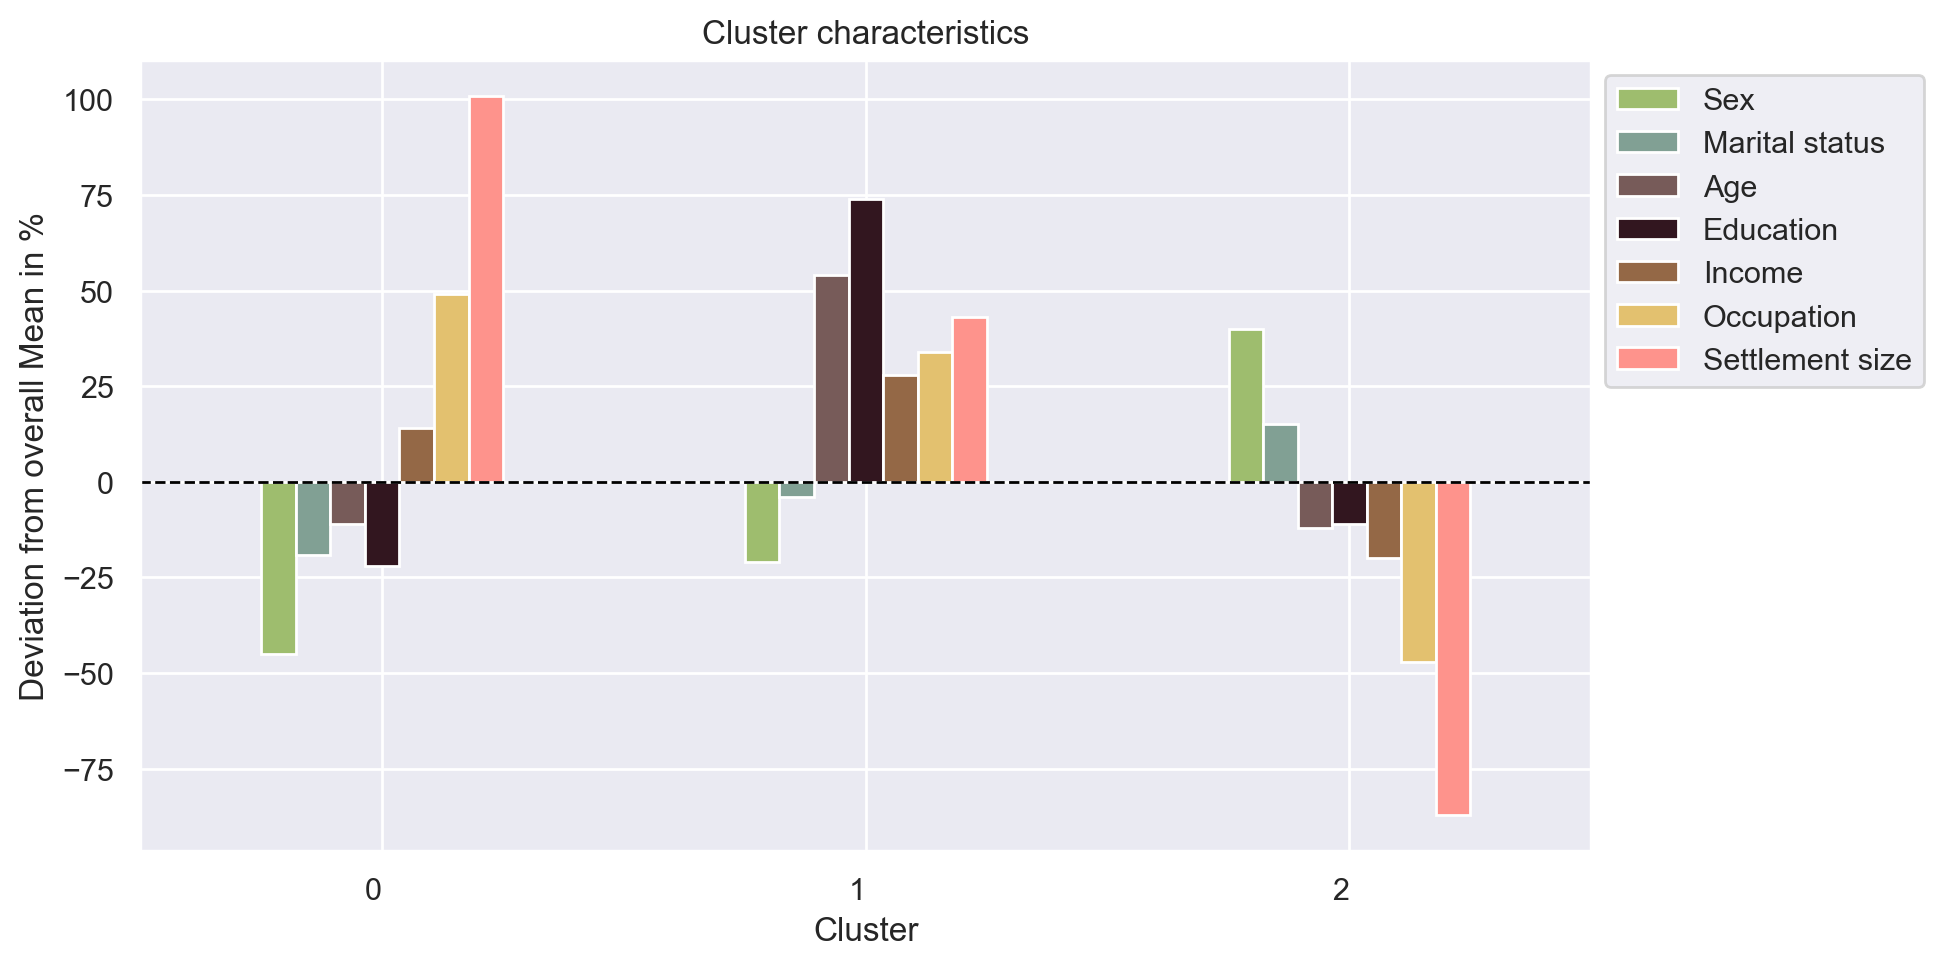

In [74]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall Mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.24,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()
fig.savefig('data/cluster_mean_deviations.png', dpi=300)

#### Customer Segmentation based on KMeans

Based on the above analysis, the following customer segmentation can be derived:
- Cluster 1: mostly male and high school educated customers who are younger than 50 years (see Figure 6) with highly regarded occupation types, mostly living in big cities, and earning slightly above average.
- Cluster 2: mostly older than 50-year-old (see Figure 6) customers who are highly educated, mostly working as skilled employees, and earning mid to top income.
- Cluster 3: high school educated customers across a wide age range (see Figure 6), mostly unemployed/unskilled, almost entirely living in small cities, and earning low to mid income.

In [75]:
# use decision tree to determine feature rules per cluster
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier
import pandas as pd

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [76]:
cluster_report(df_scaled, y_km, min_samples_leaf=10, pruning_level=0.01)

### Agglomerative Clustering

#### Determine Optimal Number of Clusters

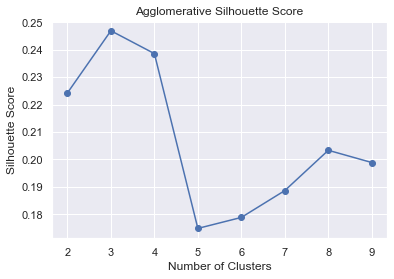

In [77]:
# determine number of clusters
silhouette_scores = []

for i in range(2,10):
    clustering = AgglomerativeClustering(n_clusters=i)
    cluster_labels = clustering.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(range(2,10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Silhouette Score')

plt.savefig('data/agglo_sil_score.png', dpi=300)

plt.show()

#### Clustering with 3 Clusters

In [78]:
# use 3 clusters
ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(df_scaled)

In [79]:
df_agglo = df.copy()
df_agglo['cluster'] = labels
df_agglo

Sex  Marital status  Age  Education  Income  Occupation  \
0       0               0   67          2  124670           1   
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
...   ...             ...  ...        ...     ...         ...   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1997    0               0   31          0   86400           0   
1998    1               1   24          1   97968           0   
1999    0               0   25          0   68416           0   

      Settlement size  cluster  
0                   2        2  
1                   2        1  
2                   0        1  
3                   1        0  
4                   1        1  
...               ...      ...  
1995                0        1  
1996                0        1  
1997                0        1  
1998                0        1  
1999                0        1  

[2000 rows x 8 columns]

In [80]:
df_agglo.cluster.value_counts()

1    1719
0     166
2     115
Name: cluster, dtype: int64

#### Cluster Analysis

In [81]:
X_mean = pd.concat([pd.DataFrame(df_agglo.mean().drop('cluster'), columns=['mean']), # overall feature means
                   df_agglo.groupby('cluster').mean().T], axis=1) # cluster means
X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1) # relative distance per cluster mean to overall mean
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean#.drop(columns=['mean'], inplace=True)

mean              0              1              2
Sex                   0.4570       0.307229       0.468296       0.504348
Marital status        0.4965       0.421687       0.500291       0.547826
Age                  35.9090      46.945783      33.093659      62.060870
Education             1.0380       1.530120       0.915067       2.165217
Income           120954.4190  204698.415663  112581.160558  125233.791304
Occupation            0.8105       1.746988       0.738220       0.539130
Settlement size       0.7390       1.536145       0.666667       0.669565

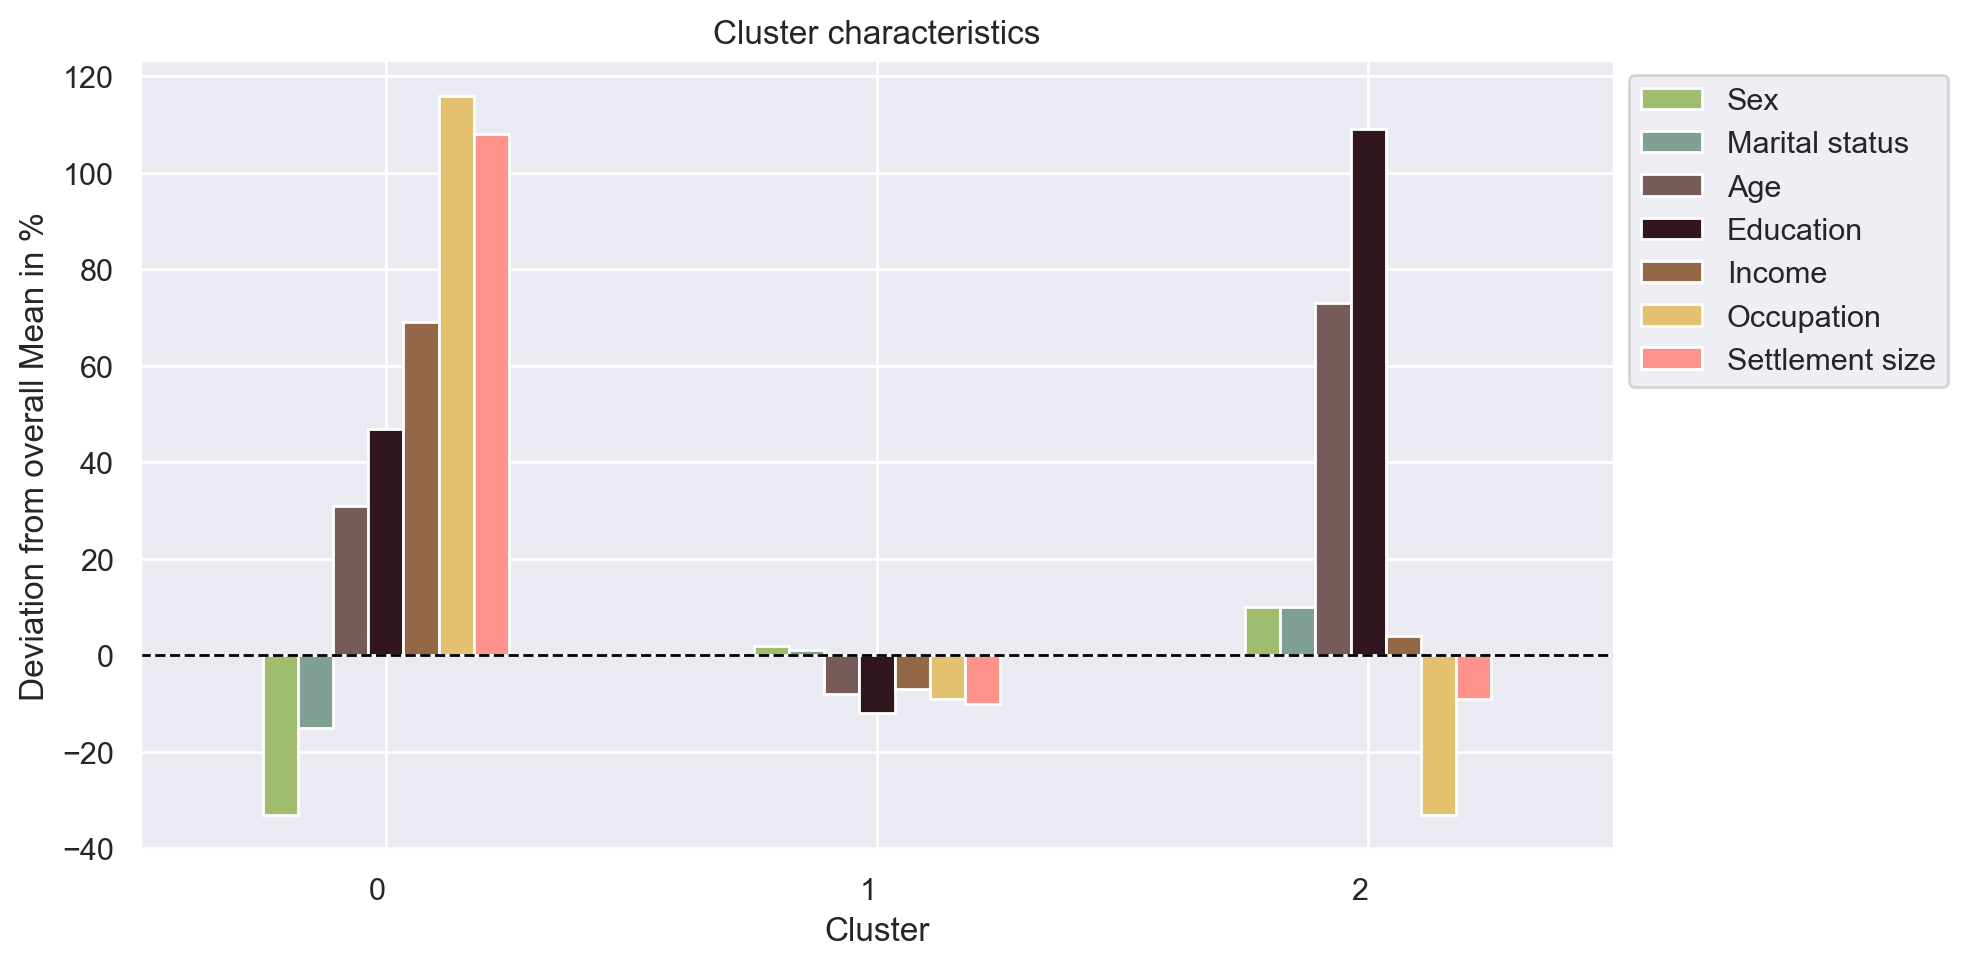

In [82]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall Mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()
fig.savefig('data/agglo_cluster_mean_deviations.png', dpi=300)

In [83]:
X_mean

mean              0              1              2
Sex                   0.4570       0.307229       0.468296       0.504348
Marital status        0.4965       0.421687       0.500291       0.547826
Age                  35.9090      46.945783      33.093659      62.060870
Education             1.0380       1.530120       0.915067       2.165217
Income           120954.4190  204698.415663  112581.160558  125233.791304
Occupation            0.8105       1.746988       0.738220       0.539130
Settlement size       0.7390       1.536145       0.666667       0.669565

In [84]:
dfi.export(X_mean.round(2), 'data/agglo_mean_overview.png')

#### Customer Segmentation based on Agglomerative Clustering

- Cluster 1: Mostly middle-aged male customers with high school or university education, working in highly qualified occupations, living in big cities, and earning top income.
- Cluster 2: Mostly younger customers with high school education, working either as skilled employee or are unskilled/unemployed, living in small to mid-sized cities, and earning slightly below average.
- Cluster 3: Old customers with a graduate school education, working in unskilled occupations or are unemployed, living in small to mid-sized cities, and earning average income.

## Comparison of Clustering Approaches

The results from the two clustering approaches differ in the following customer characteristics:
- KMeans distinctively clustered for city size for both large and small cities, while agglomerative clustering only considered one cluster for big cities but not for small ones.
- KMeans distinctively clustered for occupation type for every cluster, while agglomerative clustering only did so for two clusters.
- Income characteristics changed significantly across the algorithms. While KMeans clusters deviated from average income for every cluster (even though not so much), agglomerative clustering only has major difference for one cluster. However, for that cluster the difference is huge.
- KMeans accounts more significantly for gender compared to agglomerative clustering across all clusters.
- Overall, it looks like KMeans clusters are most distinct and allow for more granularity across most customer characteristics. This is especially the case because the second agglomerative cluster looks like the average overall customer. However, since clustering is unsupervised, one cannot know which result is more accurate.

### Recommendations

Based on the segmentation derived, the following recommendations are made for the respective customer segments.
<br>

- **Customers living in small cities, mostly unemployed with high school education:**
    - Budget-friendly product assortments
    - Loyalty programs and discounts
- **Older customers, highly educated, high income:**
    - Targeting for premium products like special wines, meats, fresh pasta etc.
    - Targeting for premium services like food delivery
- **Young customers, highly regarded occupation types, living in big cities:**
    - Cater to their busy and independent lifestyle by offering discounts on order delivery to increase retention rates. This gives big opportunities to increase the customer lifetime value as these customers are young and it is important that they stay loyal.
    - Enhance in-app experience, e.g. through gamification, to increase customer experience
    - Target these customers with healthy and regional products that are easy to make as these are most likely their preferences. However, this should be tested, e.g. through A/B testing.
    - Also focus on initiatives that enhance the brand like the reduction on food waste